In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
fifa=pd.read_csv("C:/Users/Karthik Suresh/Desktop/Fifapro/fifa.csv")
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [114]:
fifa1=pd.read_csv("C:/Users/Karthik Suresh/Desktop/Fifapro/fifa_+variable_information.csv")

In [4]:
fifa.shape

(18207, 60)

In [17]:
fifa=fifa.drop(["Club Logo","Flag","Jersey Number","Loaned From","Club"],axis=1)

In [7]:
fifa.shape

(18207, 55)

In [18]:
def value2float (value):
    value=str(value)
    if value [-1]=="M":
        return float(value[1:-1])*1000000
    elif value [-1]=='K':
        return float(value[1:-1])*1000
    else:
        return float(value[1:])
fifa["Value"]=fifa["Value"].apply (lambda x: value2float(x))
fifa["Wage"]=fifa["Wage"].apply(lambda x: value2float(x))

In [19]:
def date2string (year):
    fifa["Joined"].replace(np.nan, '')
    year=str(year)
    return float(year[-4:])
fifa["Joined"]=fifa["Joined"].apply(lambda x: date2string(x))

In [20]:
fifa["Weight"].replace(np.nan, '')
def weight2c (w):
    w=str(w)
    return float(w [0:3])
    
fifa["Weight"]=fifa["Weight"].apply(lambda x: weight2c(x))

In [21]:
fifa["Height"].replace(np.nan, '')
def height2c (h):
    h=str(h)
    h=h.replace("'",'')
    h=float(h)
    if(h<99):
        s=(h//10)
        g=(h%10)
        return float((s*30.48)+(g*2.54)) 
    else:
        f=(h//100)
        h=(h%100)
        return float((f*30.48)+(h*2.54))

fifa["Height"]=fifa["Height"].apply(lambda x: height2c(x))    

In [22]:
def releaseclause(release):
    release=str(release)
    if release[-1]=="M":
        return float(release[1:-1])*1000000
    elif release[-1]=='K':
        return float(release[1:-1])*1000
    else:
        return float(release)
fifa["Release Clause"]=fifa["Release Clause"].apply (lambda x:releaseclause(x))

In [23]:
fifa["Contract Valid Until"]=pd.to_datetime(fifa["Contract Valid Until"])

In [24]:
fifa[["Name","Height","Weight","Wage","Joined", "Value","Release Clause","Contract Valid Until"]].head(20)

,Name,Height,Weight,Wage,Joined,Value,Release Clause,Contract Valid Until
0,L. Messi,170.18,159.0,565000.0,2004.0,110500000.0,226500000.0,2021-01-01
1,Cristiano Ronaldo,187.96,183.0,405000.0,2018.0,77000000.0,127100000.0,2022-01-01
2,Neymar Jr,175.26,150.0,290000.0,2017.0,118500000.0,228100000.0,2022-01-01
3,De Gea,193.04,168.0,260000.0,2011.0,72000000.0,138600000.0,2020-01-01
4,K. De Bruyne,180.34,154.0,355000.0,2015.0,102000000.0,196400000.0,2023-01-01
5,E. Hazard,172.72,163.0,340000.0,2012.0,93000000.0,172100000.0,2020-01-01
6,L. Modrić,172.72,146.0,420000.0,2012.0,67000000.0,137400000.0,2020-01-01
7,L. Suárez,182.88,190.0,455000.0,2014.0,80000000.0,164000000.0,2021-01-01
8,Sergio Ramos,182.88,181.0,380000.0,2005.0,51000000.0,104600000.0,2020-01-01
9,J. Oblak,187.96,192.0,94000.0,2014.0,68000000.0,144500000.0,2021-01-01


In [25]:
fifa.dropna(thresh=55,inplace=True)

In [15]:
fifa.shape

(16643, 55)

In [26]:
fifa.isnull().sum()

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

In [27]:
fifa["Release Clause"].fillna(value=fifa["Release Clause"].mean(),inplace=True)

In [28]:
fifa["Joined"].fillna(value=fifa["Joined"].mean(),inplace=True)

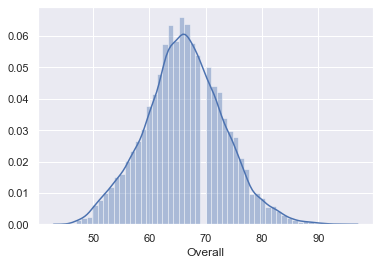

In [29]:
sns.distplot(fifa["Overall"])

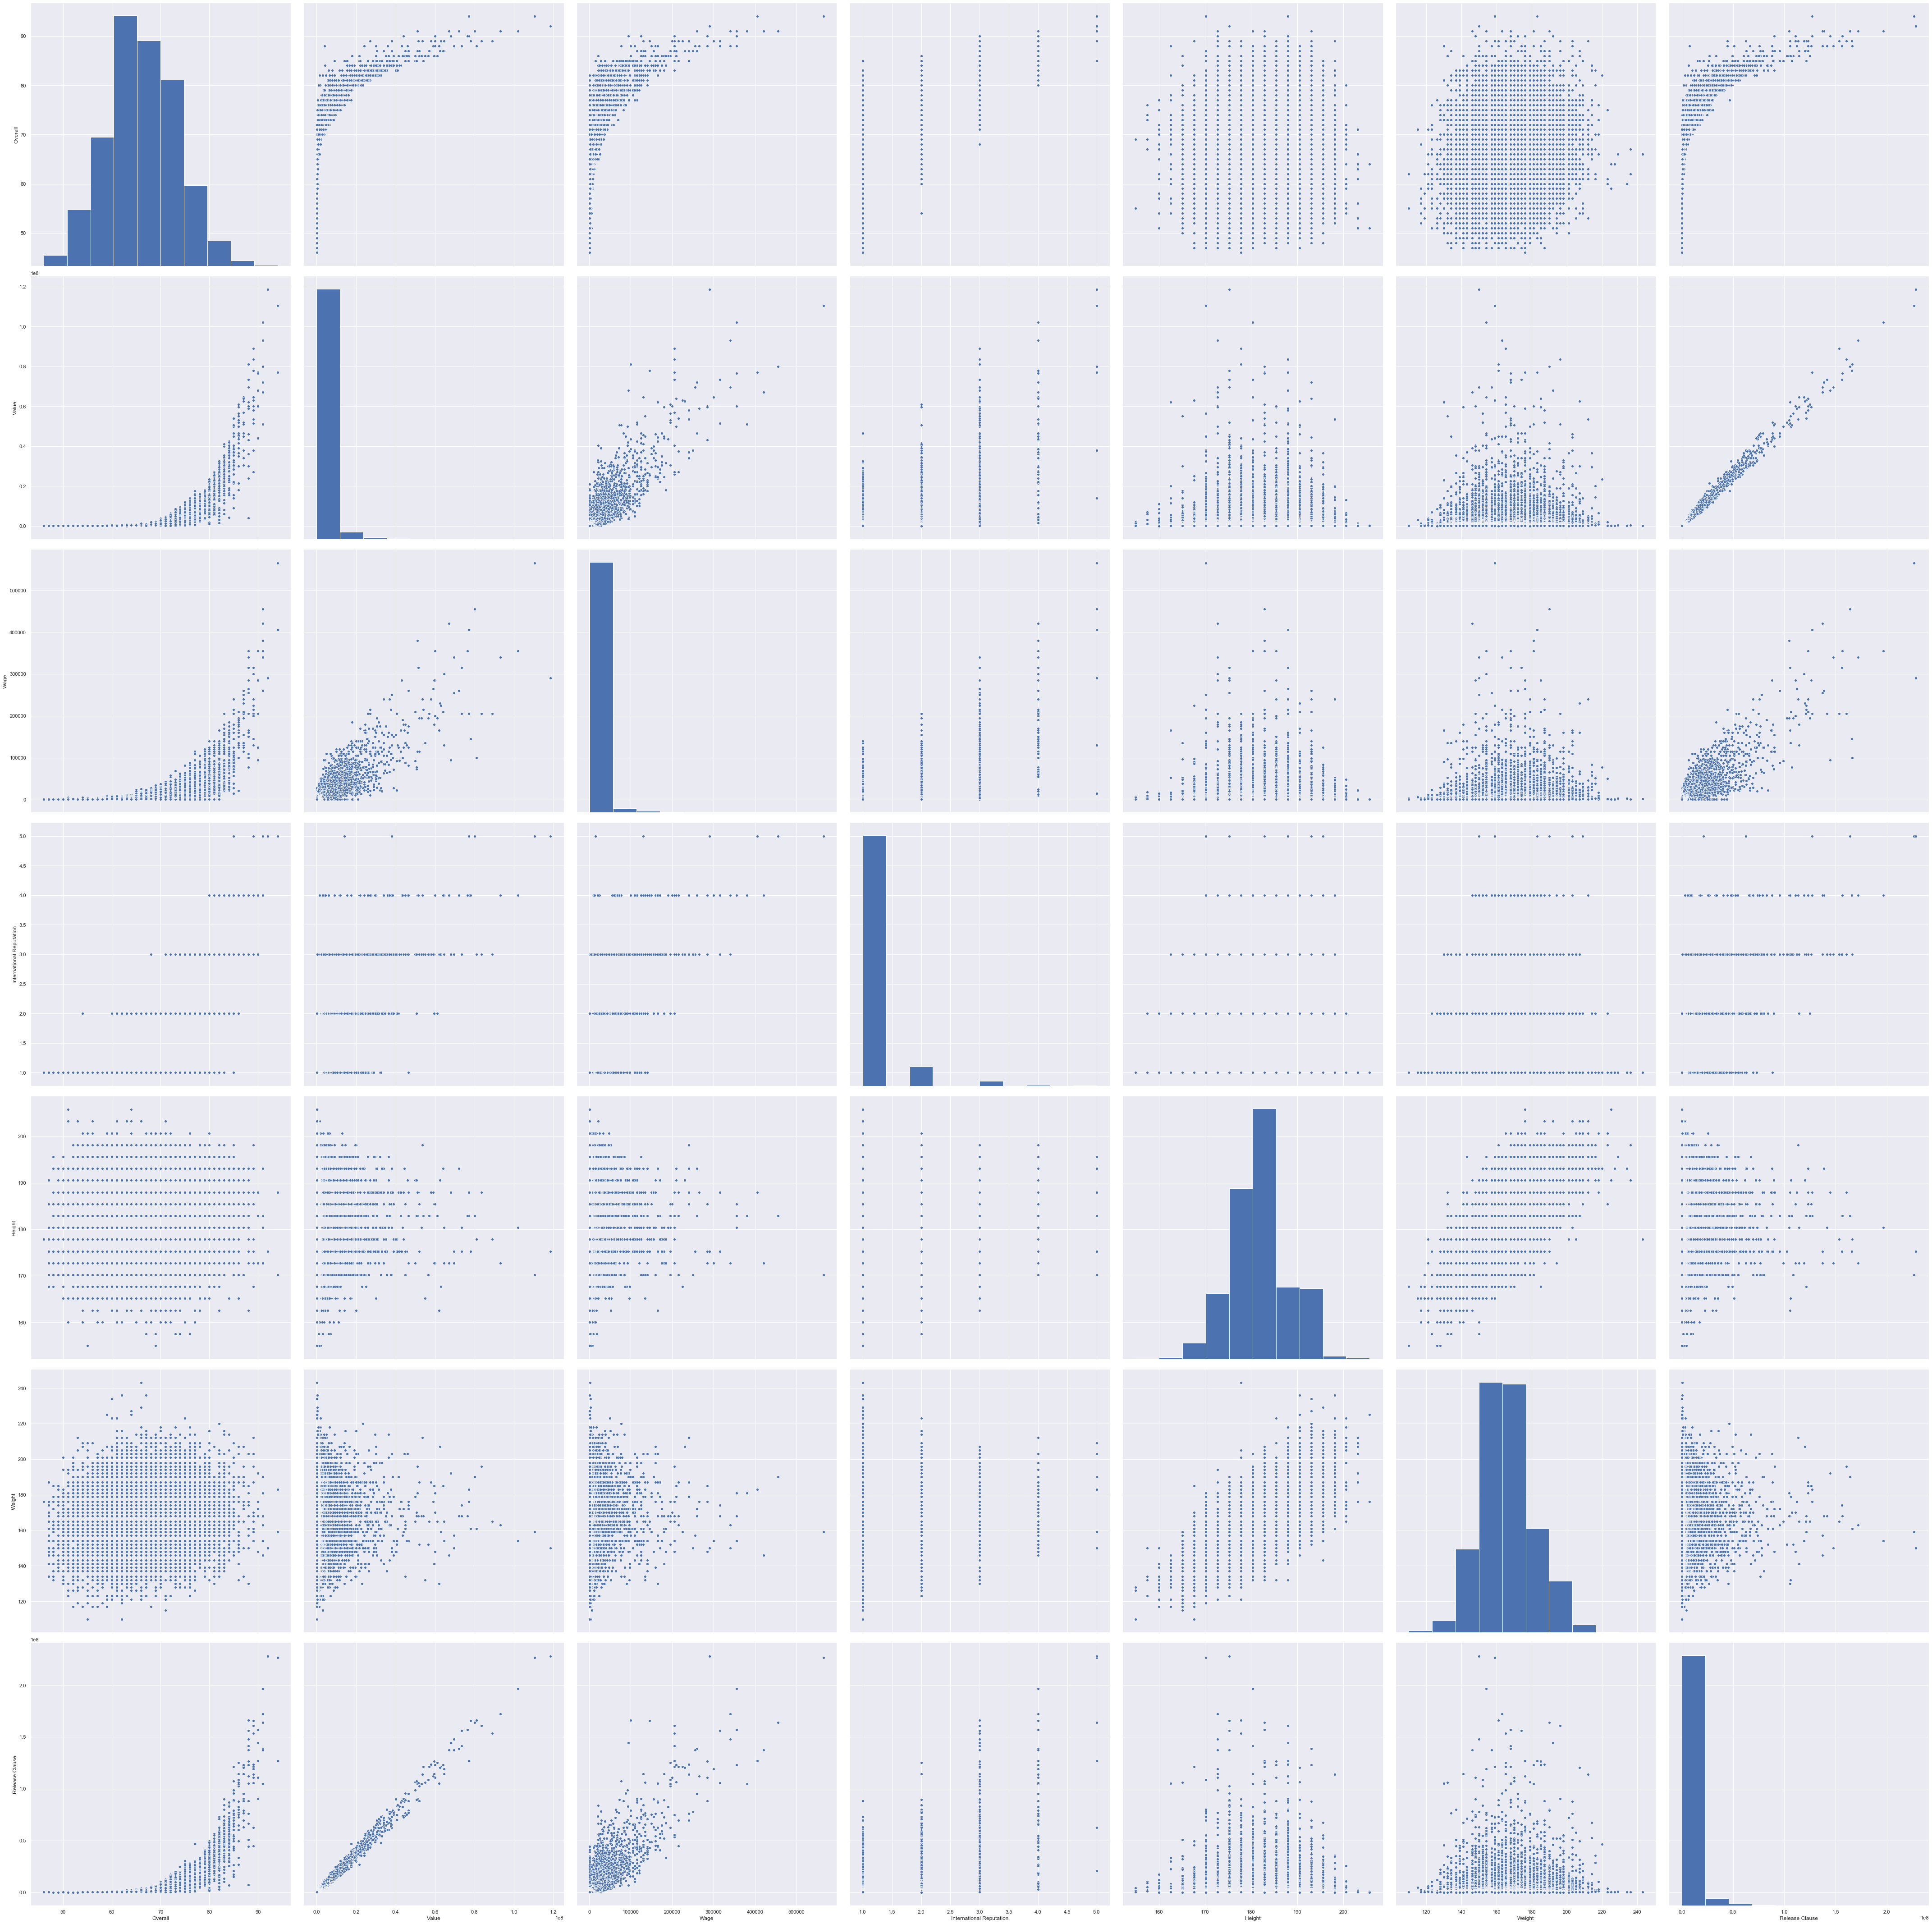

In [33]:
sns.set()
cols=["Overall", "Value" , "Wage","International Reputation","Height","Weight","Release Clause"]
sns.pairplot(fifa[cols],height=8.5)
plt.show()

In [19]:
mask = fifa.loc[:,'Contract Valid Until'] == '2020'
fifa1= fifa[mask]

In [31]:
fifa1["Ranking"]=fifa1[["Overall"]].rank(ascending=False,method="min")

C:\Users\Karthik Suresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
fifa1.sort_values(by='Ranking')
fifa20=fifa1[["Ranking","Name","Age","Wage","Value","Contract Valid Until"]].head(20)
fifa20

,Ranking,Name,Age,Wage,Value,Contract Valid Until
3,1.0,De Gea,27,260000.0,72000000.0,2020-01-01
5,1.0,E. Hazard,27,340000.0,93000000.0,2020-01-01
6,1.0,L. Modrić,32,420000.0,67000000.0,2020-01-01
8,1.0,Sergio Ramos,32,380000.0,51000000.0,2020-01-01
13,5.0,David Silva,32,285000.0,60000000.0,2020-01-01
21,6.0,E. Cavani,31,200000.0,60000000.0,2020-01-01
24,6.0,G. Chiellini,33,215000.0,27000000.0,2020-01-01
31,8.0,C. Eriksen,26,205000.0,73500000.0,2020-01-01
39,8.0,Thiago Silva,33,165000.0,24000000.0,2020-01-01
46,10.0,K. Navas,31,195000.0,30500000.0,2020-01-01


In [34]:
fifa1["Wage"].head(20).mean()

205150.0

In [35]:
fifa1["Age"].head(20).mean()

29.95

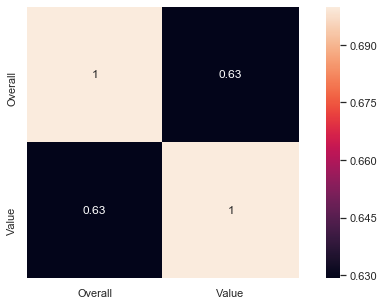

In [34]:
plt.subplots(figsize=(10,5))
cormat=fifa[["Overall","Value"]].corr().head(20)
sns.heatmap(cormat,square=True,vmax=0.7,annot=True)

In [35]:
fifa19=fifa[["Name","Position","Age","Wage","Overall"]]

In [36]:
fifa19=fifa19.groupby(['Position']).head(5).sort_values(["Position","Overall"])

In [42]:
duplicate=fifa19.drop_duplicates(["Name"],keep='first')
duplicate
mask=fifa19.duplicated()
fifa19[mask]

,Name,Position,Age,Wage,Overall


Therefore there are no duplicates

In [37]:
Fifa20=pd.pivot_table(fifa19,index=["Position","Name"])
Fifa20

Age  Overall      Wage
Position Name                                       
CAM      A. Griezmann          27       89  145000.0
         C. Eriksen            26       88  205000.0
         M. Özil               29       86  190000.0
         Roberto Firmino       26       86  195000.0
         T. Müller             28       86  135000.0
CB       D. Godín              32       90  125000.0
         M. Benatia            31       86  160000.0
         N. Otamendi           30       85  170000.0
         Naldo                 35       85   38000.0
         S. Umtiti             24       87  205000.0
CDM      Casemiro              26       88  285000.0
         Fabinho               24       84  120000.0
         Fernandinho           33       86  185000.0
         M. Pjanić             28       86  180000.0
         Sergio Busquets       29       89  315000.0
CF       A. Milik              24       81   71000.0
         L. Stindl             29       81   43000.0
         Luis Alberto          25       82   67000.0
         Raffael               33       81   41000.0
         S. Giovinco           31       82   15000.0
CM       I. Gündoğan           27       84  175000.0
         Jorginho              26       84  155000.0
         N. Keïta              23       83  120000.0
         S. Milinković-Savić   23       85   73000.0
         Thiago                27       86  130000.0
GK       De Gea                27       91  260000.0
         J. Oblak              25       90   94000.0
         M. Neuer              32       89  130000.0
         M. ter Stegen         26       89  240000.0
         T. Courtois           26       89  240000.0
...                           ...      ...       ...
RF       C. Ciano              28       75   17000.0
         D. Mertens            31       87  135000.0
         D. Valeri             32       80   12000.0
         L. Messi              31       94  565000.0
         L. Podolski           33       78   11000.0
RM       A. Di María           30       84  125000.0
         F. Thauvin            25       84   72000.0
         José Callejón         31       84  105000.0
         K. Mbappé             19       88  100000.0
         M. Salah              26       88  255000.0
RS       Falcao                32       84  115000.0
         L. Suárez             31       91  455000.0
         S. Zaza               27       81   48000.0
         W. Ben Yedder         27       82   28000.0
         Z. Ibrahimović        36       85   15000.0
RW       A. Sánchez            29       85  215000.0
         Bernardo Silva        23       86  180000.0
         Marco Asensio         22       85  215000.0
         R. Mahrez             27       85  205000.0
         R. Sterling           23       86  195000.0
RWB      D. Caligiuri          30       79   33000.0
         M. Ginter             24       80   28000.0
         P. Kadeřábek          26       80   39000.0
         Pablo Maffeo          20       78   24000.0
         S. Coleman            29       80   97000.0
ST       Cristiano Ronaldo     33       94  405000.0
         G. Bale               28       88  355000.0
         H. Kane               24       89  205000.0
         R. Lewandowski        29       90  205000.0
         S. Agüero             30       89  300000.0

[135 rows x 3 columns]

In [38]:
fifa19.groupby('Position', as_index=False)['Wage'].mean()

,Position,Wage
0,CAM,174000.0
1,CB,139600.0
2,CDM,217000.0
3,CF,47400.0
4,CM,130600.0
5,GK,192800.0
6,LAM,81600.0
7,LB,177200.0
8,LCB,162000.0
9,LCM,184400.0
